# Artificial Intelligence and Expert Systems
## Assignment 03
### Experiment I: 
### Multi Layer Perceptron (MLP)

### I. What would be the output of a Multi Layer Perceptron (MLP) if only linear activation functions are used, and what problems can it cause? Explain the impact of activation functions on the performance of an MLP network.

 Activation functions play a crucial role in the forward propagation of a neural network, adding an extra computational step. However, their inclusion is highly beneficial, as the following explanation demonstrates.

Consider a scenario where a neural network operates without activation functions. In this case, each neuron would perform a linear transformation on the inputs using the weights and biases. Regardless of the number of hidden layers added to the network, all layers would behave similarly because the combination of two linear functions results in another linear function.

Although the absence of activation functions simplifies the neural network, it makes learning complex tasks impossible. Consequently, our model would be reduced to a linear regression model, lacking the capability to handle intricate patterns or nonlinear relationships in the data.

In conclusion, activation functions are used to add nonlinearity features to neural networks, so they can learn more complex and realistic problems.  

### II. Plot and explain Leaky-Relu, PReLU, RReLU, ELU, and SELU activation functions.

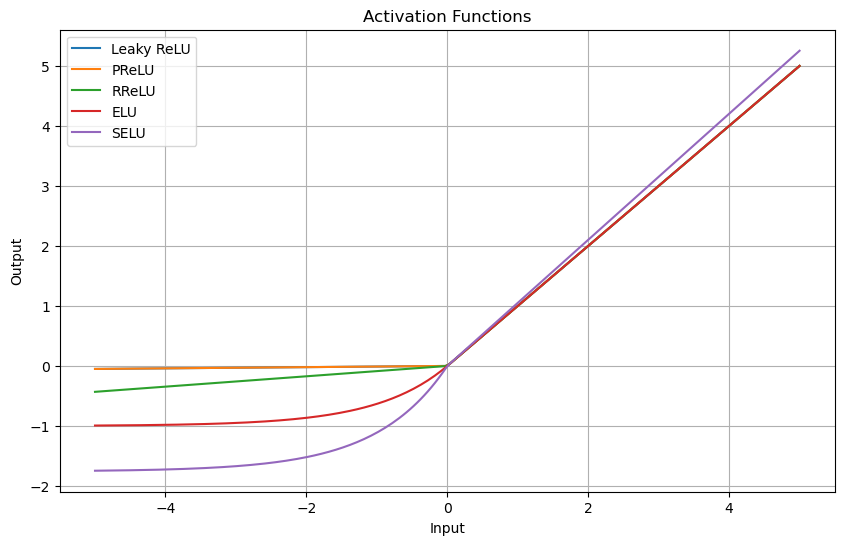

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import optimizers
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt

# Leaky ReLU
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

# PReLU
class PReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha

    def __call__(self, x):
        return np.where(x >= 0, x, self.alpha * x)

# RReLU
def rrelu(x, lower=0.01, upper=0.1):
    alpha = np.random.uniform(lower, upper)
    return np.where(x >= 0, x, alpha * x)

# ELU
def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# SELU
def selu(x, alpha=1.6733, scale=1.0507):
    return scale * np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Generate input values
x = np.linspace(-5, 5, 200)

# Compute activation values
y_leaky_relu = leaky_relu(x)
y_prelu = PReLU()(x)
y_rrelu = rrelu(x)
y_elu = elu(x)
y_selu = selu(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y_leaky_relu, label='Leaky ReLU')
plt.plot(x, y_prelu, label='PReLU')
plt.plot(x, y_rrelu, label='RReLU')
plt.plot(x, y_elu, label='ELU')
plt.plot(x, y_selu, label='SELU')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


### III. Briefly explain weight initialization and compare three methods of weight initialization:
 
#### a) assigning equal weights zero to all neurons, 
#### b) sampling Gaussian function, and 
#### c) Xavier initialization

Weight initialization is the process of assigning initial values to the weights of a neural network before training. It plays a crucial role in the convergence and performance of the model during training. Poor weight initialization can lead to issues like vanishing gradients or exploding gradients, which can hinder the learning process.

Let's compare the three methods of weight initialization you mentioned:

a) Assigning equal weights zero to all neurons:
In this method, all the weights in the network are initialized to zero. However, initializing all weights to zero can cause a problem known as "symmetry breaking." It means that all neurons in a layer would learn the same feature and have the same gradients. As a result, the network won't be able to differentiate and learn effectively.

b) Sampling from the Gaussian distribution:
This method involves initializing the weights by sampling from a Gaussian (normal) distribution. The values are randomly drawn from a Gaussian distribution with a mean of zero and a specific variance. This technique allows for randomness in weight initialization and helps in breaking the symmetry of neurons.

c) Xavier initialization (also known as Glorot initialization):
Xavier initialization is a popular method for weight initialization. It aims to keep the variance of activations and gradients relatively consistent across layers. It initializes the weights by sampling from a Gaussian distribution with zero mean and a variance that depends on the number of input and output neurons of a layer. The variance is calculated based on a specific formula derived from the activation functions used in the network.

The Xavier initialization method is often preferred as it takes into account the size of the layer's input and output, allowing for better initialization and ensuring that the gradients neither vanish nor explode during training. It provides a good balance between avoiding the aforementioned problems and enabling efficient learning in neural networks.

In summary, initializing all weights to zero (a) can cause symmetry problems, while sampling from the Gaussian distribution (b) and using Xavier initialization (c) help to introduce randomness and ensure better convergence and performance in the neural network. Among the three methods, Xavier initialization is generally considered a more effective approach for weight initialization.

### IV. For a simple regression task, a simple MLP network is used in Figure 2 with linear activation functions for hidden layers and the output layer. Using MSE loss function, calculate the partial derivatives of the loss function with respect to the biases and weights of the network. Train the network for one epoch and update the network weights and biases. You should write this without using any code. (Hint: Consider the biases equal to zero at first, X1 =3, X2=2, y=5)

Feedforward Propagation:

$$
{net}^{1} = \ {W^{1}}^{T}X + \ b^{1} = \begin{bmatrix}
1 & 2 \\
 - 0.5 & - 2 \\
0.5 & - 1 \\
\end{bmatrix}\begin{bmatrix}
3 \\
2 \\
\end{bmatrix} + 0 = \begin{bmatrix}
7 \\
 - 5.5 \\
 - 0.5 \\
\end{bmatrix}
$$


$$O^{1} = f_{\left( {net}^{1} \right)} = {net}^{1} = \begin{bmatrix}
7 \\
 - 5.5 \\
 - 0.5 \\
\end{bmatrix}$$


$$\begin{align*}

{net}^{2} = \ {W^{2}}^{T}O^{1} + \ b^{2} = \begin{bmatrix}
1 & - 0.5 & 2 \\
\end{bmatrix}\begin{bmatrix}
7 \\
 - 5.5 \\
 - 0.5 \\
\end{bmatrix} + 0 = 8.75

\end{align*}$$

$$
O^{2} = f_{\left( {net}^{2} \right)} = {net}^{2} = 8.75\
$$

$$
\left\{ \begin{matrix}
y_{i} \\
{\widehat{y}}_{i} \\
\end{matrix}\  \rightarrow e = \ y_{i} - {\widehat{y}}_{i}\  \right.\  = 8.75 - 5 = 3.75\ \
$$

$$
MSE = \ \frac{1}{N}\sum_{i = 1}^{N}{e_{i}}^{2} = \frac{1}{1}\left( {3.75}^{2} \right) = 14.06\
$$

Backward Propagation:

$$
{W_{n + 1}}^{2} = \ {W_{n}}^{2} - \eta\frac{\partial E}{\partial{W_{n}}^{2}} = {W_{n}}^{2} - \ \eta\frac{\partial E}{\partial e}\frac{\partial e}{\partial O^{2}}\frac{\partial O^{2}}{\partial{net}^{2}}\frac{\partial{net}^{2}}{\partial W^{2}} = {W_{n}}^{2} - \ \eta(2e)(1)\left( {f^{'}}_{\left( {net}^{2} \right)} \right)\left( O^{1} \right)\  \rightarrow\
$$

$$
{W_{n + 1}}^{2} = {W_{n}}^{2} - \ \eta(2e)\left( {f^{'}}_{\left( {net}^{2} \right)} \right)\left( O^{1} \right)\ \ \
$$



$$
{W_{n + 1}}^{1} = \ {W_{n}}^{1} - \eta\frac{\partial E}{\partial{W_{n}}^{1}} = \ {W_{n}}^{1} - \ \eta\frac{\partial E}{\partial e}\frac{\partial e}{\partial O^{2}}\frac{\partial O^{2}}{\partial{net}^{2}}\frac{\partial{net}^{2}}{\partial O^{1}}\frac{\partial O^{1}}{\partial{net}^{1}}\frac{\partial{net}^{1}}{\partial W^{1}} =\
$$

$$
{W_{n}}^{1} - \ \eta(2e)(1)\left( {f^{'}}_{\left( {net}^{2} \right)} \right)\left( W^{2} \right)\left( {f^{'}}_{\left( {net}^{1} \right)} \right)(X) \rightarrow\
$$

$$
{W_{n + 1}}^{1} = \ {W_{n}}^{1} - \ \eta(2e)\left( {f^{'}}_{\left( {net}^{2} \right)} \right)\left( W^{2} \right)\left( {f^{'}}_{\left( {net}^{1} \right)} \right)(X)\ \
$$



$$
{b_{n + 1}}^{2} = \ {b_{n}}^{2} - \eta\frac{\partial E}{\partial{b_{n}}^{2}} = {b_{n}}^{2} - \eta\frac{\partial E}{\partial e}\frac{\partial e}{\partial O^{2}}\frac{\partial O^{2}}{\partial{net}^{2}}\frac{\partial{net}^{2}}{\partial b^{2}} = {b_{n}}^{2} - \eta(2e)(1)(1)(1) = {b_{n}}^{2} - \eta(2e)\
$$

$$
{b_{n + 1}}^{2} = {b_{n}}^{2} - \eta(2e)\
$$



$$
{b_{n + 1}}^{1} = \ {b_{n}}^{1} - \eta\frac{\partial E}{\partial{b_{n}}^{1}} = {b_{n}}^{1} - \eta\frac{\partial E}{\partial e}\frac{\partial e}{\partial O^{2}}\frac{\partial O^{2}}{\partial{net}^{2}}\frac{\partial{net}^{2}}{\partial O^{1}}\frac{\partial O^{1}}{\partial{net}^{1}}\frac{\partial{net}^{1}}{\partial b^{1}} = {b_{n}}^{1} - \eta(2e)(1)(1)\left( W^{2} \right)(1)(1)\
$$

$$
{b_{n + 1}}^{1} = \ {b_{n}}^{1} - \eta(2e)\left( W^{2} \right)\
$$

$$
{W_{2}}^{2} = {W_{1}}^{2} - \ \eta(2e)\left( {f^{'}}_{\left( {net}^{2} \right)} \right)\left( O^{1} \right)\overset{\eta = 0.1}{\rightarrow}{W_{2}}^{2} = \begin{bmatrix}
1 \\
 - 0.5 \\
2 \\
\end{bmatrix} - (0.1)(2)(3.75)(1)\begin{pmatrix}
7 \\
 - 5.5 \\
 - 0.5 \\
\end{pmatrix} = \ \
$$

$$
\begin{bmatrix}
1 \\
 - 0.5 \\
2 \\
\end{bmatrix} - \begin{bmatrix}
5.25 \\
 - 4.125 \\
 - 0.375 \\
\end{bmatrix} = \begin{bmatrix}
 - 4.25 \\
3.625 \\
1.625 \\
\end{bmatrix}\
$$

$$
{W_{n + 1}}^{1} = \ {W_{n}}^{1} - \ \eta(2e)\left( {f^{'}}_{\left( {net}^{2} \right)} \right)\left( W^{2} \right)\left( {f^{'}}_{\left( {net}^{1} \right)} \right)(X)\overset{\eta = 0.1}{\rightarrow}\ \
$$

$$
{W_{2}}^{1} = \begin{bmatrix}
1 & 2 \\
 - 0.5 & - 2 \\
0.5 & - 1 \\
\end{bmatrix} - (0.1)(2)(3.75)(1)\begin{bmatrix}
1 \\
 - 0.5 \\
2 \\
\end{bmatrix}(1)\begin{bmatrix}
3 & 2 \\
\end{bmatrix} = \begin{bmatrix}
1 & 2 \\
 - 0.5 & - 2 \\
0.5 & - 1 \\
\end{bmatrix} - 0.75\begin{bmatrix}
1 \\
 - 0.5 \\
2 \\
\end{bmatrix}\begin{bmatrix}
3 & 2 \\
\end{bmatrix} =\
$$

$$
\begin{bmatrix}
1 & 2 \\
 - 0.5 & - 2 \\
0.5 & - 1 \\
\end{bmatrix} - 0.75\begin{bmatrix}
3 & 2 \\
 - 1.5 & - 1 \\
6 & 4 \\
\end{bmatrix} = \begin{bmatrix}
1 & 2 \\
 - 0.5 & - 2 \\
0.5 & - 1 \\
\end{bmatrix} - \begin{bmatrix}
2.25 & 1.5 \\
 - 1.125 & - 0.75 \\
4.5 & 3 \\
\end{bmatrix} = \begin{bmatrix}
 - 1.25 & - 0.5 \\
0.625 & - 1.25 \\
 - 4 & - 4 \\
\end{bmatrix}\
$$



$$
{b_{2}}^{2} = {b_{1}}^{2} - \eta(2e) = 0 - (0.1)(2)(3.75) = - 0.75\
$$

$$
{b_{2}}^{1} = \ {b_{1}}^{1} - \eta(2e)\left( W^{2} \right) = 0 - (0.1)(2)(3.75)\begin{bmatrix}
1 \\
 - 0.5 \\
2 \\
\end{bmatrix} = \begin{bmatrix}
 - 0.75 \\
0.375 \\
1.5 \\
\end{bmatrix}\
$$

### V. Explain what dropout is? What are the differences in its implementation during the training and testing stages of a deep neural network.

The term “dropout” refers to dropping out the nodes (input and hidden layer) in a neural network. All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of p.

In the overfitting problem, the model learns the statistical noise. To be precise, the main motive of training is to decrease the loss function, given all the units (neurons). So in overfitting, a unit may change in a way that fixes up the mistakes of the other units. This leads to complex co-adaptations, which in turn leads to the overfitting problem because this complex co-adaptation fails to generalise on the unseen dataset.

Now, if we use dropout, it prevents these units to fix up the mistake of other units, thus preventing co-adaptation, as in every iteration the presence of a unit is highly unreliable. So by randomly dropping a few units (nodes), it forces the layers to take more or less responsibility for the input by taking a probabilistic approach.

This ensures that the model is getting generalised and hence reducing the overfitting problem.

During the training stage, dropout is applied to the hidden units (neurons) of a neural network. The dropout rate is a hyperparameter that determines the probability of dropping out a unit. For example, if the dropout rate is set to 0.5, each unit will have a 50% chance of being dropped out during training. The dropped-out units do not contribute to the forward pass or backward pass computations for that particular training example. Instead, the network is trained on a different subnetwork at each iteration, as different units are dropped out at random. This process helps prevent overreliance on specific units and encourages the network to learn more robust and generalizable features.

During the testing stage, the dropout is turned off, and the full network is used for inference. The idea is to use the complete network to make predictions without any dropout, as the goal is to obtain the most accurate predictions possible. However, to account for the effect of dropout during training, the weights of the network are usually scaled by the dropout rate at the testing stage. This rescaling ensures that the total input to each unit remains approximately the same as it was during training, preventing the network from being too sensitive to the presence or absence of dropout during inference.

To summarize, during training, dropout is applied to the hidden units to regularize the network and reduce overfitting. During testing, dropout is turned off, and the full network is used, but the weights are typically scaled to compensate for the dropout effect during training.

### VI. Define and explain the concept of batch normalization in the context of machine learning and neural networks.

Training deep neural networks with tens of layers is challenging as they can be sensitive to the initial random weights and configuration of the learning algorithm.

One possible reason for this difficulty is the distribution of the inputs to layers deep in the network may change after each mini-batch when the weights are updated. This can cause the learning algorithm to forever chase a moving target. This change in the distribution of inputs to layers in the network is referred to the technical name “internal covariate shift.”

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

### VII. Consider the Dataset provided and Implement a network with at least 4 hidden layers, and then train the network again using dense layers followed by dropout and batch normalization.

In [3]:
dataset = pd.read_csv('Human_activity_Dataset.csv')     # shape = (10299, 563)
dataset = dataset.drop(columns=['subject/Participant'])

dataset = pd.get_dummies(dataset, columns=['Activity'])
dataset_train, dataset_valid_test = train_test_split(dataset, test_size=0.4)
dataset_valid, dataset_test = train_test_split(dataset_valid_test, test_size=0.5)

labels_train = dataset_train[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_valid = dataset_valid[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_test = dataset_test[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                            'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

features_train = dataset_train.drop(columns=labels_train)
features_valid = dataset_valid.drop(columns=labels_valid)
features_test = dataset_test.drop(columns=labels_test)

input_neuron_num = (features_train).shape[1]           # 561:   excluded columns: 'Activity' and 'subject/Participant'    
output_neuron_num = 6                                  # 6:     There are six neurons in the output layer.

#### 1. Model 01:
 No. Hidden Layers: 4
 #####
 Optimizer: Adam, Learning Rate=0.0001
 #####
 Best Result: 
 ###
 train_loss: 0.0365 - train_accuracy: 0.9879
 ###
 val_loss: 0.0565 - val_accuracy: 0.9811
 ###
 test_loss:0.0580 - test_accuracy: 0.9752

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 1.6115 - accuracy: 0.4138 - val_loss: 1.3933 - val_accuracy: 0.5932
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 1.2706 - accuracy: 0.6380 - val_loss: 1.1382 - val_accuracy: 0.6626
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0360 - accuracy: 0.6944 - val_loss: 0.9339 - val_accuracy: 0.7238
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8506 - accuracy: 0.7636 - val_loss: 0.7725 - val_accuracy: 0.7917
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.8178 - val_loss: 0.6540 - val_accuracy: 0.8180
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6016 - accuracy: 0.8463 - val_loss: 0.5603 - val_accuracy: 0.8451
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5162 - accuracy: 0.8705 - val_loss: 0.4792 - val_accuracy: 0.8748
Epoch 8/100


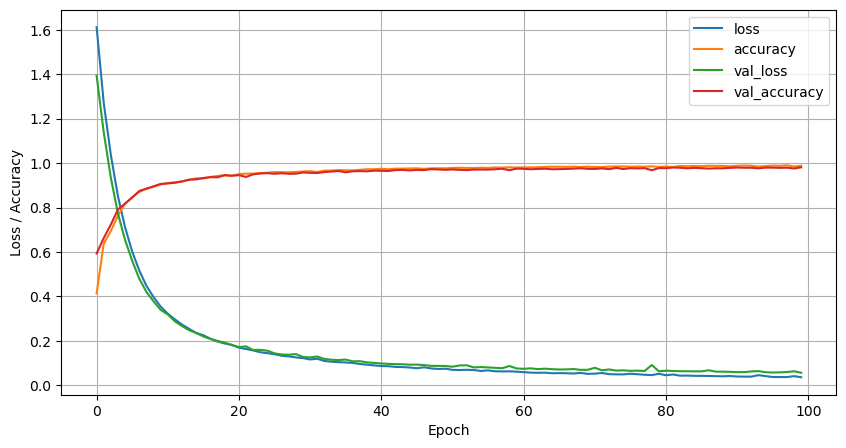

65/65 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9752
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 561)               0         
                                                                 
 dense (Dense)               (None, 128)               71936     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 90,614
Trainable params: 90,614
Non-trainable params: 0
_______________________________

In [4]:
tf.random.set_seed(42)

model_dense = tf.keras.Sequential([
                                   tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                                   tf.keras.layers.Dense(128, activation="relu"),
                                   tf.keras.layers.Dense(128, activation="relu"),
                                   tf.keras.layers.Dense(16, activation="relu"),
                                   tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                                  ])

optimizer_dense = optimizers.Adam(learning_rate=0.0001)

model_dense.compile(
                    loss="categorical_crossentropy",
                    optimizer=optimizer_dense,
                    metrics=["accuracy"]
                    )

result_hist_model_dense = model_dense.fit(features_train, 
                                          labels_train, 
                                          batch_size=256, 
                                          epochs=100, 
                                          validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_model_dense.history).plot(figsize=(10, 5), 
                                                   grid=True, 
                                                   xlabel="Epoch", 
                                                   ylabel="Loss / Accuracy")
plt.show()

dense_eval = model_dense.evaluate(features_test, labels_test)

model_dense.summary()

#### 2. Model 02:
 No. Hidden Layers: 4
 #####
 Optimizer: Adam, Learning Rate=0.0001
 #####
 Best Result: 
 ###
 train_loss: 0.0856 - train_accuracy: 0.9718
 ###
 val_loss: 0.0418 - val_accuracy: 0.9840
 ###
 test_loss:0.0412 - test_accuracy: 0.9874

Epoch 1/100
25/25 [==============================] - 2s 16ms/step - loss: 1.1434 - accuracy: 0.5595 - val_loss: 3.7379 - val_accuracy: 0.2291
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.5943 - accuracy: 0.7742 - val_loss: 1.6253 - val_accuracy: 0.6024
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.4046 - accuracy: 0.8632 - val_loss: 0.7679 - val_accuracy: 0.8141
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.3120 - accuracy: 0.8977 - val_loss: 0.3049 - val_accuracy: 0.9141
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.2558 - accuracy: 0.9120 - val_loss: 0.1746 - val_accuracy: 0.9422
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.2378 - accuracy: 0.9189 - val_loss: 0.1150 - val_accuracy: 0.9568
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.2314 - accuracy: 0.9223 - val_loss: 0.1375 - val_accuracy: 0.9529
Epoch 8/10

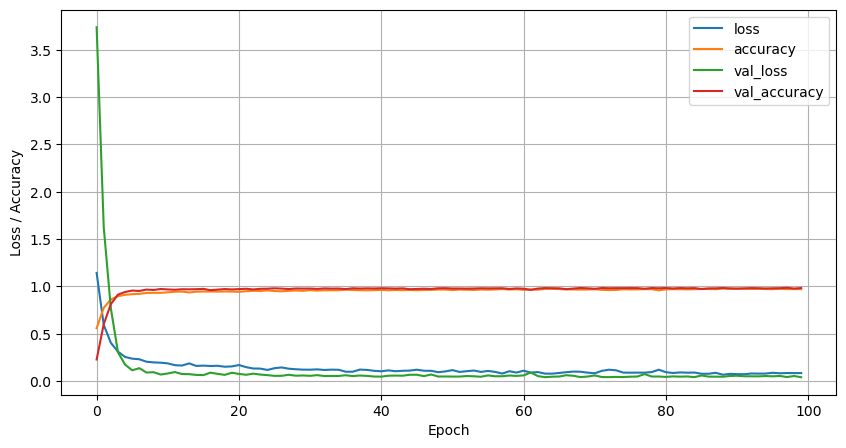

65/65 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9874
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 561)               0         
                                                                 
 dropout (Dropout)           (None, 561)               0         
                                                                 
 batch_normalization (BatchN  (None, 561)              2244      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 128)               71936     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (No

In [5]:
tf.random.set_seed(42)

model_drop_batch = tf.keras.Sequential([
                                        tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                                        tf.keras.layers.Dropout(rate=0.2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dense(128, activation="relu"),
                                        tf.keras.layers.Dropout(rate=0.2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dense(64, activation="relu"),
                                        tf.keras.layers.Dropout(rate=0.2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dense(32, activation="relu"),
                                        tf.keras.layers.Dropout(rate=0.2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dense(16, activation="relu"),
                                        tf.keras.layers.Dropout(rate=0.2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                                      ])

optimizer_drop_batch = optimizers.Adam(learning_rate=0.0067)             

model_drop_batch.compile(
                         loss="categorical_crossentropy",
                         optimizer=optimizer_drop_batch,
                         metrics=["accuracy"]
                        )

result_hist_drop_batch = model_drop_batch.fit(features_train, 
                                              labels_train, 
                                              batch_size=256, 
                                              epochs=100, 
                                              validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_drop_batch.history).plot(figsize=(10, 5), 
                                                  grid=True, 
                                                  xlabel="Epoch", 
                                                  ylabel="Loss / Accuracy")
plt.show()

drop_batch_eval = model_drop_batch.evaluate(features_test, labels_test)

model_drop_batch.summary()

### VIII. Compare the results and write your own conclusion. Does the network become overfit, underfit, or train normally? Give reasons for your answer.

Both models are trained just right and there is no sign of overfitting or underfitting in the results and models’ performances. 
Train loss and validation loss curves of both models decreased continuously and converged to a specific value.  

### IX.  What are the popular ways to prevent an MLP from becoming overfit? Mention two ways

Two commonly used methods to mitigate overfitting in MLPs are:

1. Regularization: Regularization techniques add a penalty term to the loss function during training, discouraging the model from fitting the training data too closely. Two popular regularization techniques are:

      a. L2 Regularization (Weight Decay): It adds a term proportional to the squared magnitude of weights to the loss function. This regularization term encourages smaller weights, reducing the model's tendency to overfit.

      b. Dropout: Dropout randomly sets a fraction of input units to zero during each training iteration. This technique prevents units from relying too much on specific input features and encourages the model to learn more robust and generalizable representations.

2. Early Stopping: Early stopping is a technique that monitors the model's performance on a validation dataset during training and stops the training process when the performance starts to degrade. By halting the training early, before the model overfits the training data, it prevents the model from becoming overly specialized to the training examples and improves generalization.

### X.  What are the hyperparameters of your networks. What are some ways to tune these hyperparameters efficiently? Mention some popular ways such as mesh grid search and random search.

Hyperparameters: Weight, Bias, Learning Rate, Dropout Rate, Batch Size, Number of hidden layers, Number of Epochs, Activation Function, ...






Efficiently tuning hyperparameters is crucial to achieve optimal performance in a neural network. Here are some popular methods for hyperparameter tuning:

##### 1. Grid Search: 

Grid search involves specifying a set of values for each hyperparameter of interest and exhaustively searching all possible combinations of those values. It creates a grid or mesh of hyperparameter values and evaluates the model performance for each combination. Grid search is straightforward but can become computationally expensive as the number of hyperparameters and their potential values increase.

##### 2. Random Search: 

Random search randomly samples from predefined ranges for each hyperparameter. It performs a specified number of iterations, randomly selecting hyperparameter combinations for evaluation. Random search is more efficient than grid search when there are a large number of hyperparameters and their impact on performance is uncertain. It provides a good trade-off between exploration and exploitation of the hyperparameter space.

##### 3. Bayesian Optimization: 

Bayesian optimization builds a probabilistic model of the hyperparameter space and uses it to select the most promising hyperparameters to evaluate. It employs an acquisition function that balances exploration and exploitation, guiding the search towards regions of the hyperparameter space likely to yield better performance. Bayesian optimization typically requires fewer evaluations than grid or random search and is suitable when the hyperparameter space is complex or expensive to explore.

##### 4. Automated Hyperparameter Tuning Libraries: 

Several libraries like Optuna, Hyperopt, and scikit-optimize provide automated hyperparameter tuning capabilities. These libraries use advanced search algorithms like tree-based Parzen estimators, genetic algorithms, or particle swarm optimization to efficiently explore the hyperparameter space and find optimal configurations.

##### 5. Early Stopping and Cross-Validation: 

Early stopping involves monitoring the model's performance on a validation set during training and stopping when performance starts to degrade. It helps prevent overfitting and can reduce the need for extensive hyperparameter search. Cross-validation splits the dataset into multiple subsets, allowing for more robust evaluation of different hyperparameter configurations.